In [21]:
from dl_toolbox.torch_datasets import DigitanieV2
from rasterio.windows import Window

image_path = '/work/OT/ai4geo/DATA/DATASETS/DIGITANIE/Biarritz/Biarritz_EPSG32630_5.tif'
label_path = '/work/OT/ai4geo/DATA/DATASETS/DIGITANIE/Biarritz/COS9/Biarritz_5-v4.tif'

dataset = DigitanieV2(
    image_path=image_path,
    label_path=label_path,
    labels='6',
    crop_size=2048,
    crop_step=2048,
    img_aug='no',
    tile=Window(col_off=0, row_off=0, width=2048, height=2048),
    fixed_crops=False,
    one_hot=False
)

Warning 1: Unable to save auxiliary information in /work/OT/ai4geo/DATA/DATASETS/DIGITANIE/Biarritz/Biarritz_EPSG32630_5.tif.aux.xml.


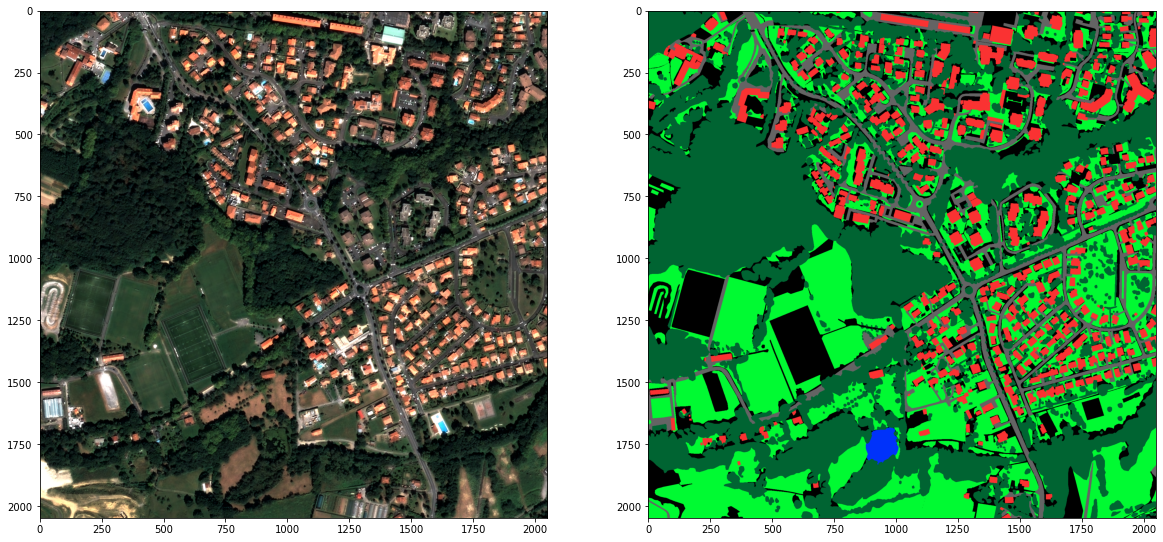

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure
img = dataset[0]['image'].numpy().transpose(1,2,0)

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

labels = dataset[0]['mask'].numpy()

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(121)
ax1.imshow(img_rescale)
ax2 = fig.add_subplot(122)
ax2.imshow(dataset.labels_to_rgb(labels))